# 14.1c: Population Dynamics (Dead vs Live)

**Visual comparison of dead and live token training dynamics**

## The Goal

Show the "big picture" shape of the data:
- Do dead and live tokens form distinct populations?
- How do their gradient magnitudes compare?
- How do their update sizes compare?

Two plots:
1. **Step sizes** (L∞ parameter updates) over time
2. **Gradient magnitudes** (L∞ gradient norms) over time

Each plot shows:
- All live tokens (thin, transparent lines)
- All dead tokens (thin, transparent lines)
- Live mean (thick line)
- Dead mean (thick line)

## Parameters

In [1]:
# Data
DATA_PATH = "../data/instrumented_run/gradient_delta_history.safetensors"

# Visualization
DPI = 100
LINE_ALPHA = 0.3  # Transparency for individual token lines
LINE_WIDTH_INDIVIDUAL = 1
LINE_WIDTH_MEAN = 2

# Colors
LIVE_COLOR = 'steelblue'
DEAD_COLOR = 'crimson'

RANDOM_SEED = 42

## Imports

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from safetensors.torch import load_file

torch.manual_seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

print("✓ Imports complete")

✓ Imports complete


## Load Data

In [3]:
print(f"Loading: {DATA_PATH}")

data = load_file(DATA_PATH)

recorded_steps = data['recorded_steps'].numpy()
dead_token_ids = data['dead_token_ids'].tolist()
live_token_ids = data['live_token_ids'].tolist()

dead_grads = data['dead_grads']  # [n_recorded, n_dead, hidden_dim]
dead_deltas = data['dead_deltas']  # [n_recorded, n_dead, hidden_dim]

live_grads = data['live_grads']  # [n_recorded, n_live, hidden_dim]
live_deltas = data['live_deltas']  # [n_recorded, n_live, hidden_dim]

print(f"\n  Recorded steps: {recorded_steps}")
print(f"  Dead tokens: {len(dead_token_ids)}")
print(f"  Live tokens (sample): {len(live_token_ids)}")
print(f"\n✓ Data loaded")

Loading: ../data/instrumented_run/gradient_delta_history.safetensors

  Recorded steps: [    0    10    20 ...  9980  9990 10000]
  Dead tokens: 51
  Live tokens (sample): 10

✓ Data loaded


## Compute Metrics

In [4]:
# Step sizes (L∞ norm of updates)
dead_step_sizes = torch.abs(dead_deltas).max(dim=2)[0]  # [n_recorded, n_dead]
live_step_sizes = torch.abs(live_deltas).max(dim=2)[0]  # [n_recorded, n_live]

# Gradient L∞ norms
dead_grad_norms = torch.abs(dead_grads).max(dim=2)[0]  # [n_recorded, n_dead]
live_grad_norms = torch.abs(live_grads).max(dim=2)[0]  # [n_recorded, n_live]

# Means
dead_step_mean = dead_step_sizes.mean(dim=1).numpy()
live_step_mean = live_step_sizes.mean(dim=1).numpy()

dead_grad_mean = dead_grad_norms.mean(dim=1).numpy()
live_grad_mean = live_grad_norms.mean(dim=1).numpy()

print(f"✓ Metrics computed")

✓ Metrics computed


## Plot 1: Step Sizes (Parameter Updates)

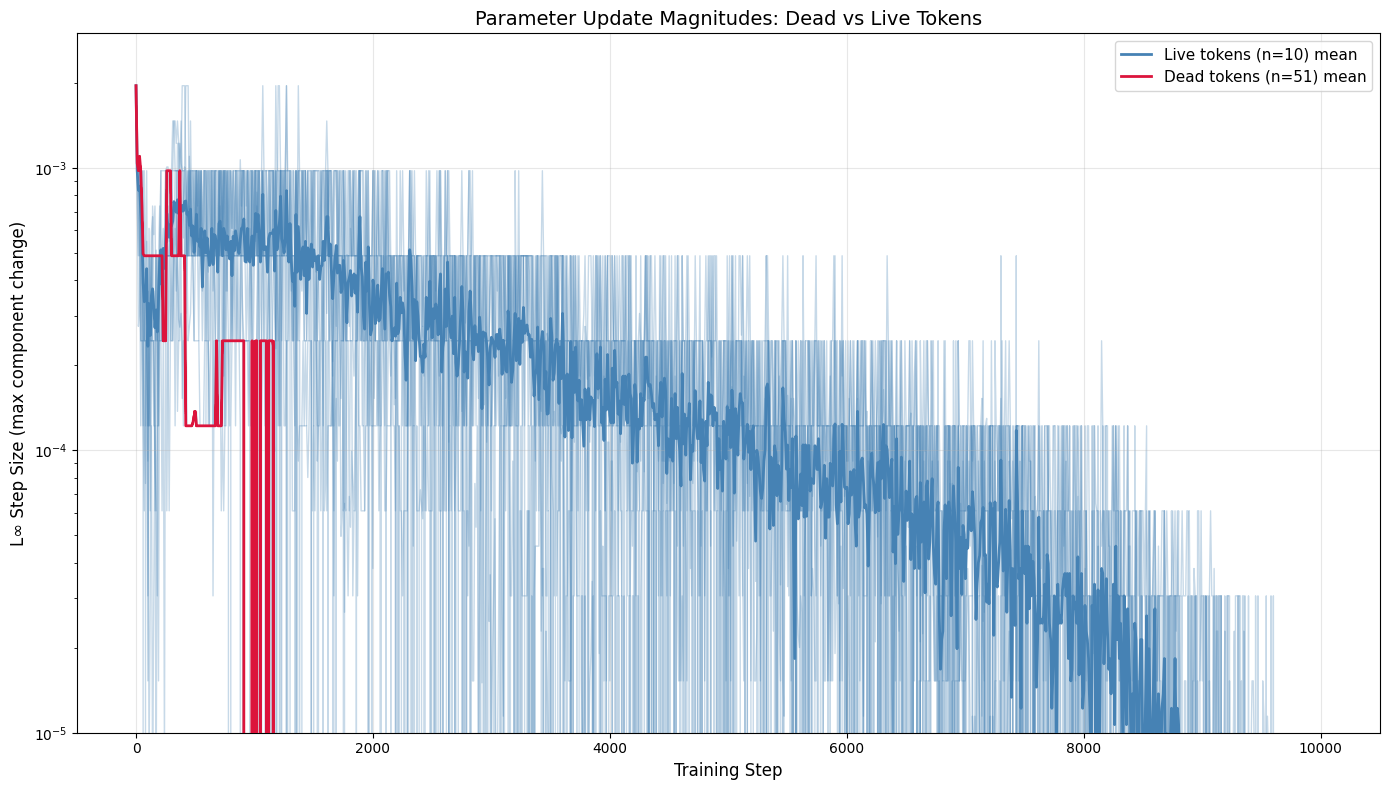


✓ Step size plot complete


In [11]:
fig, ax = plt.subplots(figsize=(14, 8), dpi=DPI)

# Z-order: individual lines in back, means on top

# Live tokens (individual)
for token_idx in range(len(live_token_ids)):
    ax.plot(recorded_steps, live_step_sizes[:, token_idx].numpy(), 
            linewidth=LINE_WIDTH_INDIVIDUAL, alpha=LINE_ALPHA, color=LIVE_COLOR, zorder=1)

# Dead tokens (individual)
for token_idx in range(len(dead_token_ids)):
    ax.plot(recorded_steps, dead_step_sizes[:, token_idx].numpy(), 
            linewidth=LINE_WIDTH_INDIVIDUAL, alpha=LINE_ALPHA, color=DEAD_COLOR, zorder=2)

# Live mean
ax.plot(recorded_steps, live_step_mean, 
        linewidth=LINE_WIDTH_MEAN, color=LIVE_COLOR, label=f'Live tokens (n={len(live_token_ids)}) mean', zorder=3)

# Dead mean
ax.plot(recorded_steps, dead_step_mean, 
        linewidth=LINE_WIDTH_MEAN, color=DEAD_COLOR, label=f'Dead tokens (n={len(dead_token_ids)}) mean', zorder=4)

ax.set_xlabel('Training Step', fontsize=12)
ax.set_ylabel('L∞ Step Size (max component change)', fontsize=12)
ax.set_title('Parameter Update Magnitudes: Dead vs Live Tokens', fontsize=14)
ax.legend(loc='best', fontsize=11)
ax.grid(alpha=0.3)
ax.set_yscale('log')
ax.set_ylim(bottom=1e-5)

plt.tight_layout()
plt.show()

print(f"\n✓ Step size plot complete")

## Plot 2: Gradient Magnitudes

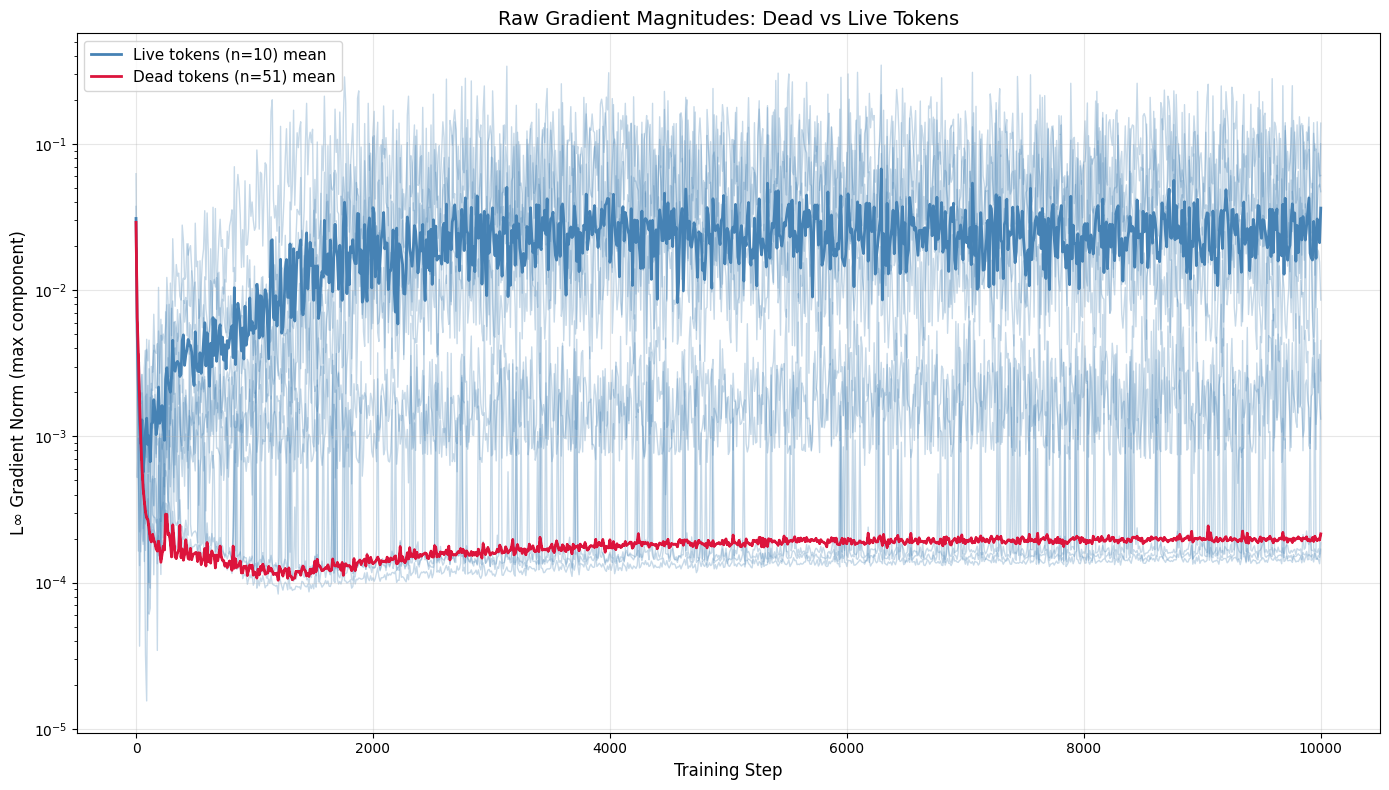


✓ Gradient magnitude plot complete


In [12]:
fig, ax = plt.subplots(figsize=(14, 8), dpi=DPI)

# Z-order: individual lines in back, means on top

# Live tokens (individual)
for token_idx in range(len(live_token_ids)):
    ax.plot(recorded_steps, live_grad_norms[:, token_idx].numpy(), 
            linewidth=LINE_WIDTH_INDIVIDUAL, alpha=LINE_ALPHA, color=LIVE_COLOR, zorder=1)

# Dead tokens (individual)
for token_idx in range(len(dead_token_ids)):
    ax.plot(recorded_steps, dead_grad_norms[:, token_idx].numpy(), 
            linewidth=LINE_WIDTH_INDIVIDUAL, alpha=LINE_ALPHA, color=DEAD_COLOR, zorder=2)

# Live mean
ax.plot(recorded_steps, live_grad_mean, 
        linewidth=LINE_WIDTH_MEAN, color=LIVE_COLOR, label=f'Live tokens (n={len(live_token_ids)}) mean', zorder=3)

# Dead mean
ax.plot(recorded_steps, dead_grad_mean, 
        linewidth=LINE_WIDTH_MEAN, color=DEAD_COLOR, label=f'Dead tokens (n={len(dead_token_ids)}) mean', zorder=4)

ax.set_xlabel('Training Step', fontsize=12)
ax.set_ylabel('L∞ Gradient Norm (max component)', fontsize=12)
ax.set_title('Raw Gradient Magnitudes: Dead vs Live Tokens', fontsize=14)
ax.legend(loc='best', fontsize=11)
ax.grid(alpha=0.3)
ax.set_yscale('log')

plt.tight_layout()
plt.show()

print(f"\n✓ Gradient magnitude plot complete")

## Statistics

In [13]:
print(f"\n{'='*80}")
print(f"POPULATION COMPARISON")
print(f"{'='*80}\n")

print(f"Step sizes at step {recorded_steps[0]}:")
print(f"  Live mean: {live_step_mean[0]:.6e}")
print(f"  Dead mean: {dead_step_mean[0]:.6e}")
print(f"  Ratio (dead/live): {dead_step_mean[0] / live_step_mean[0]:.4f}")

print(f"\nStep sizes at step {recorded_steps[-1]}:")
print(f"  Live mean: {live_step_mean[-1]:.6e}")
print(f"  Dead mean: {dead_step_mean[-1]:.6e}")
print(f"  Ratio (dead/live): {dead_step_mean[-1] / live_step_mean[-1]:.4f}")

print(f"\nGradient magnitudes at step {recorded_steps[0]}:")
print(f"  Live mean: {live_grad_mean[0]:.6e}")
print(f"  Dead mean: {dead_grad_mean[0]:.6e}")
print(f"  Ratio (dead/live): {dead_grad_mean[0] / live_grad_mean[0]:.4f}")

print(f"\nGradient magnitudes at step {recorded_steps[-1]}:")
print(f"  Live mean: {live_grad_mean[-1]:.6e}")
print(f"  Dead mean: {dead_grad_mean[-1]:.6e}")
print(f"  Ratio (dead/live): {dead_grad_mean[-1] / live_grad_mean[-1]:.4f}")

print(f"\n{'='*80}")


POPULATION COMPARISON

Step sizes at step 0:
  Live mean: 1.953125e-03
  Dead mean: 1.953125e-03
  Ratio (dead/live): 1.0000

Step sizes at step 10000:
  Live mean: 0.000000e+00
  Dead mean: 0.000000e+00
  Ratio (dead/live): nan

Gradient magnitudes at step 0:
  Live mean: 3.090820e-02
  Dead mean: 2.905273e-02
  Ratio (dead/live): 0.9400

Gradient magnitudes at step 10000:
  Live mean: 3.638048e-02
  Dead mean: 2.150629e-04
  Ratio (dead/live): 0.0059



/var/folders/k5/44vd1ct56xj4y9h7x213kvjr0000gn/T/ipykernel_82118/1164654880.py:13: RuntimeWarning: invalid value encountered in scalar divide
  print(f"  Ratio (dead/live): {dead_step_mean[-1] / live_step_mean[-1]:.4f}")


## Interpretation

**What to look for:**

1. **Separation**: Do dead and live tokens form distinct populations?
2. **Relative magnitudes**: Are dead token gradients consistently smaller?
3. **Convergence**: Do dead tokens form a tight band (similar behavior)?
4. **Evolution**: Do both populations decay over time?

**Expected pattern:**
- **Early**: Both populations have similar gradients (all tokens stacked)
- **Mid**: Live tokens larger (they're being trained), dead tokens smaller (rarely predicted)
- **Late**: Dead tokens plateau (minimal updates), live tokens continue evolving